In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nuclear Reaction - PP1 Chain
## a) See pdf
## b) See pdf
## c) See pdf
## d)

In [2]:
def equations(Y, Y_0, dt):
    """Reaction network for the pp1 Chain"""
    C_p = (Y[0]-Y_0[0])/dt + Y[0]**2*l_pp + Y[0]*Y[1]*l_pd - 2*(Y[2]**2/2)*l_He
    C_d = (Y[1]-Y_0[1])/dt - Y[0]**2/2*l_pp + Y[0]*Y[1]*l_pd
    C_3He = (Y[2]-Y_0[2])/dt - Y[0]*Y[1]*l_pd + 2*(Y[2]**2/2)*l_He
    C_4He = (Y[3]-Y_0[3])/dt - Y[2]**2/2*l_He
    
    return np.array([C_p, C_d, C_3He, C_4He])


def jacobian(Y, dt):
    """Jacobian matrix of the pp1 reaction network"""
    J_pp = 1/dt + 2*Y[0]*l_pp + Y[1]*l_pd
    J_pd = Y[0]*l_pd
    J_p3He = -2*Y[2]*l_He
    
    J_dp = - Y[0]*l_pp + Y[1]*l_pd
    J_dd = 1/dt + Y[0]*l_pd
    
    J_3Hep = - Y[1]*l_pd
    J_3Hed = - Y[0]*l_pd
    J_3He3He = 1/dt + 2*Y[2]*l_He
    
    J_4He3He = - Y[2]*l_He
    J_4He4He = 1/dt
    
    return np.array([[J_pp, J_pd, J_p3He, 0],
                    [J_dp, J_dd, 0, 0],
                    [J_3Hep, J_3Hed, J_3He3He, 0],
                    [0, 0, J_4He3He, J_4He4He]])


def X_tot(p,d,He3,He4):
    """Total abundancy"""
    X_p = A_p*p
    X_d = A_d*d
    X_3He = A_3He*He3
    X_4He = A_4He*He4
    X_tot = X_p + X_d + X_3He + X_4He
    
    return np.log10(np.abs((X_tot-X_tot[0])/X_tot[0]))


def energy(Y):
    """Nuclear energy released per unit mass"""
    e_pp = Q_pp * Y[0]**2/2*l_pp*N_A
    e_pd = Q_pd * Y[1]*l_pd*N_A
    e_3He3He = Q_3He3He * Y[2]**2/2*l_He*N_A
    
    return [e_pp, e_pd, e_3He3He]

In [4]:
def backward_euler_raphson_newton():
    t_max = 3.14e27 # s
    t = 0 # s
    dt = 1e-1 # s
    eps = 1e-3
    alpha = 1e-1
    
    # Initialize Y
    Y = np.array([Y_p, Y_d, Y_3He, Y_4He])
    
    # Allocate memory space for the solution
    sol = np.array([])
    time = np.array([])
    ergs = np.array([])
    
    while t < t_max:
        # Store (t, Y_n)
        time = np.append(time, t)
        sol = np.concatenate((sol, Y), axis=0)
        
        Y_np1 = np.copy(Y)
        Omega = 2*eps
        
        while Omega > eps:
            C = equations(Y_np1, Y, dt)
            J = jacobian(Y_np1, dt)
            J_inv = np.linalg.inv(J)
            dY = np.dot(J_inv, C)
            Y_np1 -= dY
            Omega = np.max(np.abs(dY/Y_np1))
            
        dt = alpha*dt*np.min(np.abs(Y_np1/(Y_np1-Y)))
        Y = np.copy(Y_np1)
        
        # Store energy
        erg = energy(Y)
        ergs = np.append(ergs, erg)
        t += dt
        
    return sol, time, ergs      

In [5]:
# Avogadro constant
N_A = 6.02214076e23 

# Initial abundancies 
Y_p = 7.095e-1
Y_d = 1.378e-5
Y_3He = 2.822e-5
Y_4He = 6.875e-2

# Reaction rates for the pp1 chain
l_pp = 8.1e-20*160 #cm^3/(g*s)
l_pd = 0.011*160 #cm^3/(g*s)
l_He = 2.2e-10*160 #cm^3/(g*s)

# Mass numbers
A_p = 1
A_d = 2
A_3He = 3
A_4He = 4

# Q-values associated with the pp1 chain
mev_to_erg = 1.6022e-6
Q_pp = 1.192 * mev_to_erg 
Q_pd = 5.493 * mev_to_erg 
Q_3He3He = 12.859 * mev_to_erg 

## e)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


Text(0, 0.5, 'Mass fraction abundancies $Y_i$')

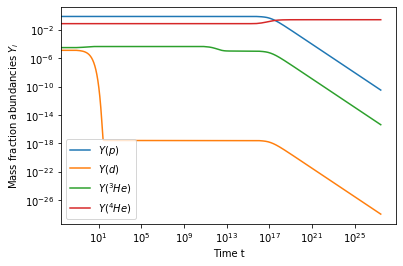

In [6]:
sol, time, ergs = backward_euler_raphson_newton()

sol = sol.reshape((len(time),4))

y_p = sol[:,0]
y_d = sol[:,1]
y_3He = sol[:,2]
y_4He = sol[:,3]

plt.plot(time, y_p, label="$Y(p)$")
plt.plot(time, y_d, label="$Y(d)$")
plt.plot(time, y_3He, label="$Y(^3He)$")
plt.plot(time, y_4He, label="$Y(^4He)$")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Time t")
plt.ylabel("Mass fraction abundancies $Y_i$")

## f)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time t')

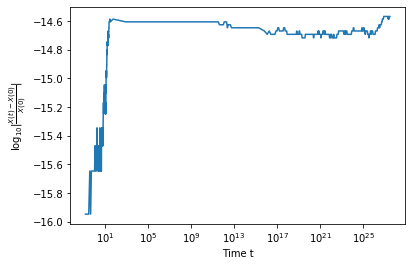

In [8]:
x_tot = X_tot(y_p, y_d, y_3He, y_4He)

plt.plot(time, x_tot)
plt.xscale("log")
plt.ylabel("$\log_{10}|\\frac{X(t)-X(0)}{X(0)}|$")
plt.xlabel("Time t")

## g)

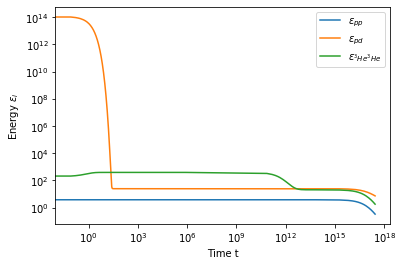

In [131]:
ergs = ergs.reshape(time.shape[0],3)

e_pp = ergs[:,0]
e_pd = ergs[:,1]
e_3He3He = ergs[:,2]

plt.plot(time, e_pp, label="$\epsilon_{pp}$")
plt.plot(time, e_pd, label="$\epsilon_{pd}$")
plt.plot(time, e_3He3He, label="$\epsilon_{^3He^3He}$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Time t")
plt.ylabel("Energy $\epsilon_i$")
plt.legend()

At the start, the proton/deuterium reaction dominates the energy release, but as soon as the deuterium reaction stops, the Helium burning is contributing most to the energy release